## Домашнее задание к лекции «Задачи классификации и кластеризации»

### Задание.

+ Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
+ Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
+ Разделите данные на выборку для обучения и тестирования
+ Постройте модель LDA
+ Визуализируйте предсказания для тестовой выборки и центры классов
+ Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
+ Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [54]:
# загружаем данные в датафрейм
data = pd.DataFrame({'sepal_length': iris.data[:, 0], 'sepal_width': iris.data[:, 1]})
data

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [55]:
variety = iris.target
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25)

In [19]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [20]:
lda = LinearDiscriminantAnalysis()

In [21]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [22]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 1,
       0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1])

In [41]:
# смотрим разницу факта и прогноза
result = pd.DataFrame({'fact': y_test, 'predict': lda.predict(X_test)}).T
result

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
fact,0,2,2,0,0,0,1,1,1,2,...,1,1,2,2,0,1,2,0,2,2
predict,0,1,2,0,0,0,2,1,1,2,...,1,1,2,1,0,2,2,0,2,1


In [36]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# метод подходит, т.к. классы сбалансированы

from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.8157894736842105

In [ ]:
# вывод-  ошибки есть, видим и на глаз, и по метрики точности

In [43]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-6.47760509,  8.48518883],
       [ 2.15014615, -4.28474414],
       [ 4.44062452, -4.42595754]])

In [27]:
# посмотрим на наши центроиды
lda.means_

array([[4.96578947, 3.41315789],
       [5.98055556, 2.77777778],
       [6.57368421, 2.98947368]])

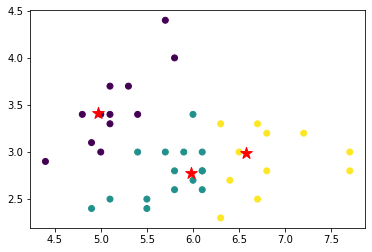

In [58]:
# визуализируем предсказания для тестовой выборки и центры классов
plt.scatter(X_test['sepal_length'], X_test['sepal_width'], c=lda.predict(X_test))
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

In [ ]:
# задача класстеризации

In [42]:
data

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

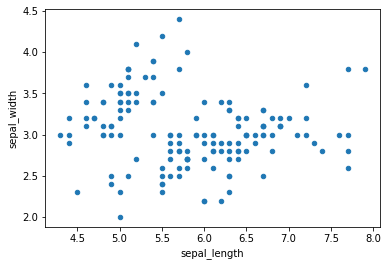

In [53]:
# визуализируем все значения
data.plot(kind='scatter', x='sepal_length', y='sepal_width')

In [59]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
# fit-transform сразу обучается и преобразует данные
data_scaled = scaler.fit_transform(data)

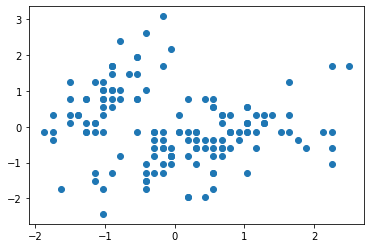

In [62]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1])

In [63]:
from sklearn.cluster import KMeans

In [66]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters_2 = kmeans.fit_predict(data_scaled)
clusters_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [88]:
kmeans = KMeans(n_clusters=3)
clusters_3 = kmeans.fit_predict(data_scaled)
kmeans = KMeans(n_clusters=4)
clusters_4 = kmeans.fit_predict(data_scaled)
kmeans = KMeans(n_clusters=5)
clusters_5 = kmeans.fit_predict(data_scaled)

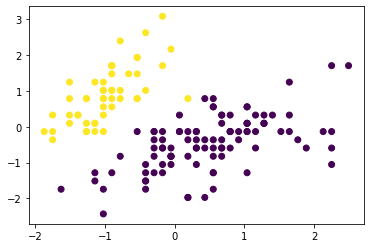

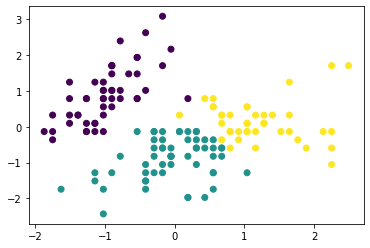

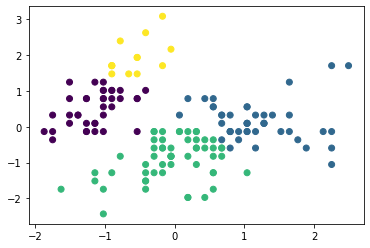

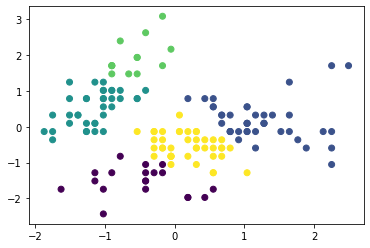

In [89]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_2)
plt.show()
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_3)
plt.show()
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_4)
plt.show()
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_5)

In [85]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 15)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    k_inertia.append(clf_kmeans.inertia_)

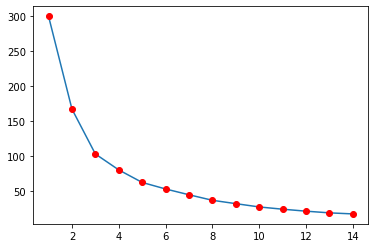

In [86]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [ ]:
# глобально судя по графику оптимальной будет разбивка 4-5 классов